<a href="https://colab.research.google.com/github/JonathanPhillips/NBA_Finals_Sim/blob/main/NBAFinalsSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
gdf = pd.read_csv('/content/stats_nba_com-teamgamelogs-2021_22-regular_season.csv')

In [16]:
gdf.columns

Index(['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'OPP_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object')

In [17]:
gdf['GAME_DATE'] = pd.to_datetime(gdf['GAME_DATE'])

In [18]:
gswdf = gdf[gdf.TEAM_ABBREVIATION == 'GSW']
miadf = gdf[gdf.TEAM_ABBREVIATION == 'MIA']

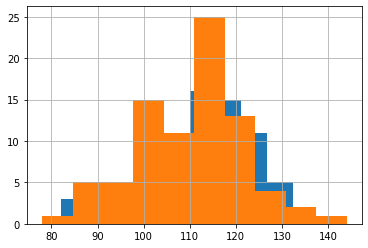

In [19]:
gswdf.PTS.hist()
miadf.PTS.hist()

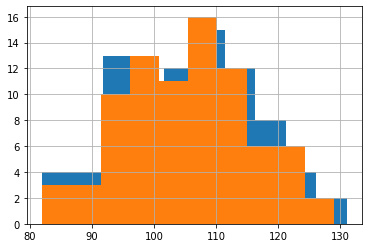

In [20]:
gswdf.OPP_PTS.hist()
miadf.OPP_PTS.hist()

In [22]:
gswmeanpts = gswdf.PTS.mean()
miameanpts = miadf.PTS.mean()
gswsdpts = gswdf.PTS.std()
miadpts = miadf.PTS.std()

gswmeanopp = gswdf.OPP_PTS.mean()
miameanopp = miadf.OPP_PTS.mean()
gswsdopp = gswdf.OPP_PTS.std()
miasdopp = miadf.OPP_PTS.std()

print("Golden State Points Mean ", gswmeanpts)
print("Golden State Points SD ", gswsdpts)
print("Miami Points Mean ", miameanpts)
print("Miami Points SD ", miadpts)

print("Golden State OppPoints Mean ", gswmeanopp)
print("Golden State OppPoints SD ", gswsdopp)
print("Miami OppPoints Mean ", miameanopp)
print("Miami OppPoints SD ", miasdopp)

Golden State Points Mean  111.0
Golden State Points SD  11.777777777777779
Miami Points Mean  110.02439024390245
Miami Points SD  11.715743981114247
Golden State OppPoints Mean  105.46341463414635
Golden State OppPoints SD  11.129091143386683
Miami OppPoints Mean  105.57317073170732
Miami OppPoints SD  9.921955312827713


In [26]:
def gameSim():
    GSWScore = (rnd.gauss(gswmeanpts,gswsdpts)+ rnd.gauss(miameanopp,miasdopp))/2
    MIAScore = (rnd.gauss(miameanpts,miadpts)+ rnd.gauss(gswmeanopp,gswsdopp))/2
    if int(round(GSWScore)) > int(round(MIAScore)):
        return 1
    elif int(round(GSWScore)) < int(round(MIAScore)):
        return -1
    else: return 0

In [27]:
def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('GSW Win ', team1win/(team1win+team2win+tie),'%')
    print('MIA Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return gamesout
        

In [31]:
gamesSim(100000)

GSW Win  0.49987 %
MIA Win  0.4641 %
Tie  0.03603 %


[-1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1